# RANDOM FOREST CLASSIFIER

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.metrics import f1_score

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target

In [3]:
print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify = y, shuffle = True, random_state =144)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(52500, 784)
(52500,)
(17500, 784)
(17500,)


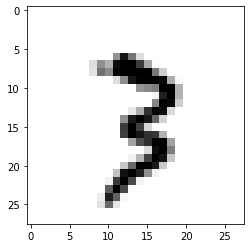

In [6]:
import matplotlib
dig = x[25000]
dig_img = dig.reshape(28,28)
plt.imshow (dig_img, cmap = matplotlib.cm.binary)

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, n_estimators=100)

In [8]:
rf = rf.fit (X_train, y_train)

In [9]:
rf.score(X_test, y_test)
print("Training set score: {:.3f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(rf.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.966


In [10]:
pred_rf = rf.predict(X_test)

In [11]:
f1_score (y_test, pred_rf, average='macro')

0.965352050597696

In [12]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix (y_test, pred_rf)
print('Confusion matrix:\n{}'.format(con_mat))

Confusion matrix:
[[1707    1    2    1    0    3    5    0    6    1]
 [   0 1943    6    4    4    1    3    4    2    2]
 [   5    1 1699    6   11    1    3    8   11    3]
 [   6    0   21 1694    0   15    3   17   19   10]
 [   2    2    2    0 1660    0   11    4    1   24]
 [   6    2    1   22    0 1514   13    1   10    9]
 [  11    3    1    0    2   10 1686    0    6    0]
 [   2   11   22    3   10    0    0 1757    1   17]
 [   4    6   13   19    9   13    8    3 1613   18]
 [   4    5    5   17   29    9    1   24   20 1626]]


# SUPPORT VECTOR MACHINE

In [13]:
from sklearn import svm
from sklearn import svm
svm_model = svm.LinearSVC(C=10.0)
svm_model.fit(X_train,y_train)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=10.0)

In [14]:
print("Training set score: {:.3f}".format(svm_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svm_model.score(X_test, y_test)))

Training set score: 0.882
Test set score: 0.862


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [16]:
svm_model = svm.LinearSVC(C=50.0)
svm_model.fit(X_train_scale,y_train)
print("Training set score: {:.3f}".format(svm_model.score(X_train_scale, y_train)))
print("Test set score: {:.3f}".format(svm_model.score(X_test_scale, y_test)))

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training set score: 0.898
Test set score: 0.874


In [17]:
pred_svm = svm_model.predict(X_test_scale)

In [18]:
f1_score (y_test, pred_svm, average='macro')

0.8719028139856719

In [19]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix (y_test, pred_svm)
print('Confusion matrix:\n{}'.format(con_mat))

Confusion matrix:
[[1653    0    9    5    7   20   11    2   15    4]
 [   1 1911    9    4    2    9    3    4   18    8]
 [  15   42 1425   38   24   23   37   33   88   23]
 [  21   19   85 1426    7   78   10   27   68   44]
 [   5    6   17    7 1498   10   13    8   33  109]
 [  33   14   13   70   28 1304   33    5   48   30]
 [  14   12   23    4   15   37 1594    1   15    4]
 [  17   15   19    6   26   11    2 1610   10  107]
 [  13   46   37   46   12   78   23   16 1385   50]
 [   8   13    5   23   48   19    1   96   45 1482]]
